#Classificação de séries temporais multivariadas de sinais de Libras


<img src="https://gitlab.com/tamiresrezende/CSTSL/-/raw/master/Figures/salinas_vertical_jpg.jpg" width="1"/>
<tr>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</tr>
 <img src="https://gitlab.com/tamiresrezende/CSTSL/-/raw/master/Figures/logo-white-bg.jpg" width="10"/>



[MINDS - Machine Intelligence and Data Science Lab  ](http://www.minds.eng.ufmg.br/)

Tamires M. Rezende, Patrícia O. Lucas, Sílvia G. M. Almeida e Frederico G. Guimarães


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://gitlab.com/tamiresrezende/CSTSL.git
!pip install keras-tcn==3.4.0

In [ ]:
from CSTSL import Run_experiments
from CSTSL import Plots as plots
from CSTSL import base
import sqlite3
import pandas as pd
import numpy as np

#Datasets

In [ ]:
#DATASET MINDS
database_path = '/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Database/Experimentos'
matriz_relativo = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/Matriz30x150_dadosrelativos.npy")
matriz_shift_warp = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/Matriz30x150_shift_warp.npy")
matriz_W7 = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/Matriz30x150_suavizacao_W7.npy")
matriz_warp = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/Matriz30x150_warp.npy")
sinal = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/sinal.npy")
sinalizador = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Minds_reorganizado/sinalizadores.npy")
#Concatenando todas as matrizes
matriz = np.concatenate((matriz_relativo, matriz_shift_warp, matriz_W7, matriz_warp), axis=0)
sinais = np.concatenate((sinal, sinal, sinal, sinal), axis=0)
sinalizadores = np.concatenate((sinalizador, sinalizador, sinalizador, sinalizador), axis=0)
print("Tamanho da matriz de entrada (MINDS):", matriz.shape)
print("Tamanho da matriz de rótulos dos sinais (MINDS):", sinais.shape)
print("Tamanho da matriz de rótulos dos sinalizadores (MINDS):", sinalizadores.shape)

#DATASET UFOP
#matriz normalizada com 8 pontos dos braços
matriz_UFOP_reduzida = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Dataset_UFOP_modificado/matriz_reduzida.npy")
matriz_UFOP_shift_warp = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Ufop_DA/matriz_shift_warp.npy")
matriz_UFOP_W7 = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Ufop_DA/matriz_suavizacaoW7.npy")
matriz_UFOP_warp = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Versão 3/Dataset_Ufop_DA/matriz_warp.npy")
sinais_UFOP = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Dataset_UFOP_modificado/sinal.npy")
sinalizadores_UFOP = np.load("/content/drive/MyDrive/PROJETO_TAMIRES/Dataset_UFOP_modificado/sinalizador.npy")
#Concatenando todas as matrizes
matriz_UFOP = np.concatenate((matriz_UFOP_reduzida, matriz_UFOP_shift_warp, matriz_UFOP_W7, matriz_UFOP_warp), axis=0)
sinais_UFOP = np.concatenate((sinais_UFOP, sinais_UFOP, sinais_UFOP, sinais_UFOP), axis=0)
sinalizadores_UFOP = np.concatenate((sinalizadores_UFOP, sinalizadores_UFOP, sinalizadores_UFOP, sinalizadores_UFOP), axis=0)
print("Tamanho da matriz de entrada (UFOP):", matriz_UFOP.shape)
print("Tamanho da matriz de rótulos dos sinais (UFOP):", sinais_UFOP.shape)
print("Tamanho da matriz de rótulos dos sinalizadores (UFOP):", sinalizadores_UFOP.shape)

Tamanho da matriz de entrada (MINDS): (4800, 30, 150)
Tamanho da matriz de rótulos dos sinais (MINDS): (4800,)
Tamanho da matriz de rótulos dos sinalizadores (MINDS): (4800,)
Tamanho da matriz de entrada (UFOP): (8960, 24, 100)
Tamanho da matriz de rótulos dos sinais (UFOP): (8960,)
Tamanho da matriz de rótulos dos sinalizadores (UFOP): (8960,)


#####Separação por categoria

In [ ]:
def split_categoria(matriz, sinais, sinalizadores, categoria):
    index1 = np.where(sinais > categoria[1])
    index2 = np.where(sinais < categoria[0])
    index = np.concatenate((index1, index2), axis=1)
    index3 = np.where(sinais == categoria[2])
    new_matriz = np.delete(matriz, index, axis=0)
    new_matriz = np.concatenate((new_matriz, matriz[index3]), axis=0)
    new_sinalizadores = np.delete(sinalizadores, index)
    new_sinalizadores = np.concatenate((new_sinalizadores, sinalizadores[index3]), axis=0)
    new_sinais = np.delete(sinais, index)
    new_sinais = np.concatenate((new_sinais, sinais[index3]), axis=0)
    return new_matriz, new_sinalizadores, new_sinais

In [ ]:
c1 = [1,10,0]
matriz_c1, sinalizadores_c1, sinais_c1 = split_categoria(matriz_UFOP, sinais_UFOP, sinalizadores_UFOP, c1)
print(matriz_c1.shape)
print(sinalizadores_c1.shape)
c2 = [11,29,4]
matriz_c2, sinalizadores_c2, sinais_c2 = split_categoria(matriz_UFOP, sinais_UFOP, sinalizadores_UFOP, c2)
print(matriz_c2.shape)
print(sinalizadores_c2.shape)
c3 = [30,37,0]
matriz_c3, sinalizadores_c3, sinais_c3 = split_categoria(matriz_UFOP, sinais_UFOP, sinalizadores_UFOP, c3)
print(matriz_c3.shape)
print(sinalizadores_c3.shape)
c4 = [38,56,21]
matriz_c4, sinalizadores_c4, sinais_c4 = split_categoria(matriz_UFOP, sinais_UFOP, sinalizadores_UFOP, c4)
print(matriz_c4.shape)
print(sinalizadores_c4.shape)

(1600, 24, 100)
(1600,)
(3040, 24, 100)
(3040,)
(1280, 24, 100)
(1280,)
(3200, 24, 100)
(3200,)


In [ ]:
np.unique(sinais_UFOP)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57.])

#Metodologia dos experimentos:

<center>
<table><img src="https://gitlab.com/tamiresrezende/CSTSL/-/raw/master/Figures/diagram_experiments.png" width="700"/>
</table>
</center>

##Pré-processamento: data augmentation

Base de dados após o data augmentation: $Matriz_{(150,30,1200)}$, onde $X$ são as séries temporais referentes a coordenada $x$ e $Y$ são as séries temporais referentes a coordenada $y$ dos pontos.
<center>
<table>
<img src="https://gitlab.com/tamiresrezende/CSTSL/-/raw/master/Figures/amostras_DA_tecnicas.png" width="400"/>
<tr>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</tr>
<img src="https://gitlab.com/tamiresrezende/CSTSL/-/raw/master/Figures/diagram-20210422.png" width="300"/>
</table>
</center>

In [ ]:
# Dados relativos
matriz = base.processing_relationdata3(sinais, sinalizadores, gravacoes, path_data = 'drive/MyDrive/2020DatabaseSign/KinectV2Data/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_dadosrelativos/')
# Suavizacao W=7
matriz = base.processing_smoothingdata(matriz_path = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_dadosrelativos/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_suavizacaoW5/', lag=7)
# Time Warp
matriz = base.processing_warpdata(matriz_path = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_dadosrelativos/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_warp/')
# Shift gaussiano
matriz = base.processing_shiftdata(matriz_path = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_dadosrelativos/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_shift/')

In [ ]:
# Shift gaussiano + Warp
matriz = base.processing_shiftdata(matriz_path = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_dadosrelativos/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_shift_warp/')
matriz = base.processing_warpdata(matriz_path = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_shift_warp/', path_save = 'drive/MyDrive/PROJETO_TAMIRES/Dataset/Matriz30x150_shift_warp/')

#Treino e Teste

In [ ]:
Run_experiments.experiment(matriz, sinais, sinalizadores, name_experiment="MINDS_DA_SINALIZADOR", num_execute=30, 
                           database_path = database_path, num_feat=150, num_classes=20, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, total_sinalizadores=12, 
                           num_sinalizadores=12) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

In [ ]:
Run_experiments.experiment(matriz, sinais, sinalizadores, name_experiment="MINDS_DA_CLASSES", num_execute=30, 
                           database_path = database_path, num_feat=150, num_classes=20, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, form=None) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

In [ ]:
Run_experiments.experiment(matriz, sinais, sinalizadores, name_experiment="MINDS_DA_SINALIZADOR_6", num_execute=30, 
                           database_path = database_path, num_feat=150, num_classes=20, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, total_sinalizadores=12, 
                           num_sinalizadores=6) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

In [ ]:
Run_experiments.experiment(matriz, sinais, sinalizadores, name_experiment="MINDS_DA_SINALIZADOR_6b", num_execute=30, 
                           database_path = database_path, num_feat=150, num_classes=20, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, total_sinalizadores=12, 
                           num_sinalizadores=6) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

Execução: 0  Sinalizador: 2
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 00079: early stopping
13/13 [==============================] - 0s 3ms/step - loss: 0.9691 - accuracy: 0.7700
Execução: 0  Sinalizador: 3
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00086: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 1.9013 - accuracy: 0.6650
Execução: 0  Sinalizador: 7
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
13/13 [==============================] - 0s 3ms/step - loss: 1.5621 - accuracy: 0.7500
Execução: 0  Sinalizador: 8
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00074: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 1.3366 - accuracy: 0.7000
Execução: 0  Sinalizador: 10
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00063: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 1.8086 - accuracy: 0.6200
Execução: 0  Sinalizador: 12
x.shape= (None, 16)
model.x = (None, 30, 15

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00083: early stopping
13/13 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.7875
Execução: 1  Sinalizador: 10
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00048: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 3.1703 - accuracy: 0.5975
Execução: 1  Sinalizador: 12
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00065: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 2.2852 - accuracy: 0.6875
Execução: 2  Sinalizador: 2
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00083: early stopping
13/13 [==============================] - 0s 4ms/step - loss: 0.8629 - accuracy: 0.8200
Execução: 2  Sinalizador: 3
x.shape= (None, 16)
model.x = (None, 30, 150)
model.y = (None, 20)
Epoch 00099: early stopping
13/13 [==============================] - 0s 3ms/step - loss: 1.

In [ ]:
Run_experiments.experiment(matriz_UFOP, sinais_UFOP, sinalizadores_UFOP, name_experiment="UFOP_DA_SINALIZADOR", num_execute=30, 
                           database_path = database_path, num_feat=100, num_classes=60, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, total_sinalizadores=5, 
                           num_sinalizadores=5) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

In [ ]:
Run_experiments.experiment(matriz_c2, sinais_c2, sinalizadores_c2, name_experiment="UFOP_DA_C2", num_execute=30, 
                           database_path = database_path, num_feat=100, num_classes=60, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, 
                           total_sinalizadores=5, num_sinalizadores=5) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

In [ ]:
Run_experiments.experiment(matriz_c4, sinais_c4, sinalizadores_c4, name_experiment="UFOP_DA_C4", num_execute=30, 
                           database_path = database_path, num_feat=100, num_classes=60, nb_filters=16, 
                           kernel_size=11, dilations=3, dropout_rate=0, nb_stacks=1, 
                           total_sinalizadores=5, num_sinalizadores=5) 
                           #form = None para experimentos por classes. 
                           #Para experimentos com sinalizadores não usar form.

#Resultados

##Média e desvio padrão geral

In [ ]:
pd.DataFrame(Run_experiments.execute("DELETE FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR_6b'",database_path))

Empty DataFrame
Columns: []
Index: []

In [ ]:
df_all = pd.DataFrame(Run_experiments.execute("SELECT * FROM results",database_path))
df_all.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
print('\033[1m' + 'Média' + '\033[0m')
print(df_all.groupby("Experimento").mean())

print('\033[1m'+'\n\nDesvio padrão'+'\033[0m')
print(df_all.groupby("Experimento").std())

Média
                         Accuracy  Precision    Recall        F1  Time_seconds
Experimento                                                                   
MINDS_DA_CLASSES         0.980000   0.981826  0.980030  0.977823    113.790934
MINDS_DA_SINALIZADOR     0.765125   0.803876  0.765125  0.746752    138.023920
MINDS_DA_SINALIZADOR_6   0.737097   0.768784  0.737097  0.714542    100.311063
MINDS_DA_SINALIZADOR_6b  0.744792   0.787538  0.744792  0.724456    108.692575
UFOP_C1                  0.618964   0.656477  0.618834  0.574112     19.743808
UFOP_C2                  0.631034   0.707119  0.630817  0.600409     31.968518
UFOP_C3                  0.795402   0.822930  0.795672  0.768113     12.135263
UFOP_C4                  0.615924   0.678043  0.616171  0.578911     30.630232
UFOP_DA_C1               0.796360   0.834853  0.796371  0.782885     54.913829
UFOP_DA_C2               0.841362   0.884525  0.841309  0.829681     58.633726
UFOP_DA_C3               0.914230   0.929709  

##Média e desvio padrão por sinalizador MINDS/UFOP

#####MINDS

In [ ]:
df_sinal = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR'",database_path))
df_sinal.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
print('\033[1m' + 'Média por sinaizador' + '\033[0m')
print(df_sinal.groupby("Sinalizador").mean())

print('\033[1m'+'\n\nDesvio padrão por sinalizador'+'\033[0m')
print(df_sinal.groupby("Sinalizador").std())

Média por sinaizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
1            0.817333   0.856873  0.817333  0.808184    138.660421
10           0.603500   0.652450  0.603500  0.573974    129.399904
11           0.793583   0.809805  0.793583  0.768482    137.029026
12           0.805250   0.835013  0.805250  0.791705    149.856893
2            0.805833   0.840102  0.805833  0.788266    131.561127
3            0.668500   0.715337  0.668500  0.641819    134.135175
4            0.786250   0.824096  0.786250  0.775187    139.467540
5            0.798667   0.797760  0.798667  0.781414    133.725948
6            0.751583   0.820824  0.751583  0.736020    137.407580
7            0.778667   0.831019  0.778667  0.757207    148.157870
8            0.739667   0.794431  0.739667  0.724749    145.209002
9            0.832667   0.868796  0.832667  0.814018    131.676555


Desvio padrão por sinalizador
         

#####UFOP

In [ ]:
df_sinal = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_SINALIZADOR'",database_path))
df_sinal.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
print('\033[1m' + 'Média por sinaizador' + '\033[0m')
print(df_sinal.groupby("Sinalizador").mean())

print('\033[1m'+'\n\nDesvio padrão por sinalizador'+'\033[0m')
print(df_sinal.groupby("Sinalizador").std())

Média por sinaizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
1            0.904428   0.926617  0.904428  0.900486    285.164547
2            0.918101   0.932891  0.918100  0.915670    278.208238
3            0.930394   0.943928  0.930385  0.928651    273.825553
4            0.924765   0.939658  0.924764  0.921669    286.385331
5            0.911143   0.927354  0.911141  0.907305    279.578363


Desvio padrão por sinalizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
1            0.074360   0.049930  0.074357  0.077236     24.371206
2            0.056102   0.042694  0.056096  0.058730     22.122553
3            0.058338   0.042118  0.058336  0.060520     18.708506
4            0.052914   0.040141  0.052914  0.056056     23.639276
5            0.062435   0.047964  0.062431  0.067138     17.021807


##Média e desvio padrão por sinalizador MINDS (6)

In [ ]:
df_sinal = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR_6'",database_path))
df_sinal.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
print('\033[1m' + 'Média por sinaizador' + '\033[0m')
print(df_sinal.groupby("Sinalizador").mean())

print('\033[1m'+'\n\nDesvio padrão por sinalizador'+'\033[0m')
print(df_sinal.groupby("Sinalizador").std())

Média por sinaizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
10           0.588250   0.631038  0.588250  0.556609    101.291178
11           0.800000   0.817969  0.800000  0.776199    105.180128
12           0.786833   0.821589  0.786833  0.771010    100.558086
3            0.667583   0.704711  0.667583  0.637978     96.243072
5            0.780833   0.788449  0.780833  0.761641     98.991652
7            0.799083   0.848947  0.799083  0.783813     99.602261


Desvio padrão por sinalizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
10           0.061854   0.063805  0.061854  0.065547     24.740287
11           0.041766   0.040546  0.041766  0.049739     29.751213
12           0.047092   0.052143  0.047092  0.054010     27.235818
3            0.047035   0.058154  0.047035  0.060122     26.259259
5        

In [ ]:
df_sinal = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR_6b'",database_path))
df_sinal.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
print('\033[1m' + 'Média por sinaizador' + '\033[0m')
print(df_sinal.groupby("Sinalizador").mean())

print('\033[1m'+'\n\nDesvio padrão por sinalizador'+'\033[0m')
print(df_sinal.groupby("Sinalizador").std())

Média por sinaizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
10           0.592333   0.636717  0.592333  0.559950    106.338618
11           0.787167   0.809865  0.787167  0.762275    118.267269
12           0.789000   0.824679  0.789000  0.772676    110.797592
2            0.832875   0.864620  0.832875  0.821442    107.688755
3            0.652167   0.693783  0.652167  0.621443    108.311760
7            0.774083   0.828526  0.774083  0.753691    107.499678
8            0.730875   0.790326  0.730875  0.716370    105.554725


Desvio padrão por sinalizador
             Accuracy  Precision    Recall        F1  Time_seconds
Sinalizador                                                       
10           0.055273   0.062071  0.055273  0.058488     26.298664
11           0.092463   0.092865  0.092463  0.102746     24.581343
12           0.048951   0.051352  0.048951  0.056197     28.571486
2        

##Curva ROC por classe MINDS

<Figure size 432x288 with 0 Axes>

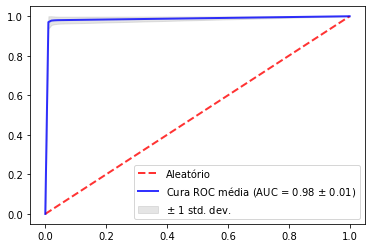

In [ ]:
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_CLASSES'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(20, df_class['y_hat'], df_class['y_test'])

##Curva ROC por sinalizador MINDS/UFOP

#####MINDS

<Figure size 432x288 with 0 Axes>

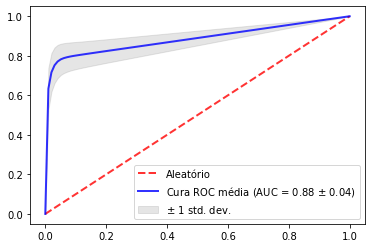

In [ ]:
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(20, df_class['y_hat'], df_class['y_test'])

#####UFOP

<Figure size 432x288 with 0 Axes>

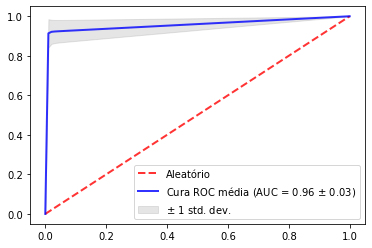

In [ ]:
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_SINALIZADOR'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(56, df_class['y_hat'], df_class['y_test'])

##### UFOP - Categorias

<Figure size 432x288 with 0 Axes>

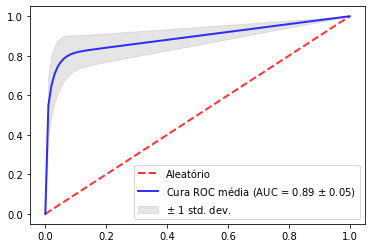

In [ ]:
# C1 = 10 CLASSES
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_C1'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(10, df_class['y_hat'], df_class['y_test'])

<Figure size 432x288 with 0 Axes>

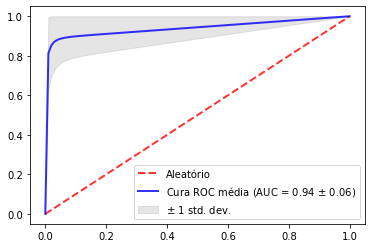

In [ ]:
# C2 = 20 CLASSES
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_C2'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(19, df_class['y_hat'], df_class['y_test'])

<Figure size 432x288 with 0 Axes>

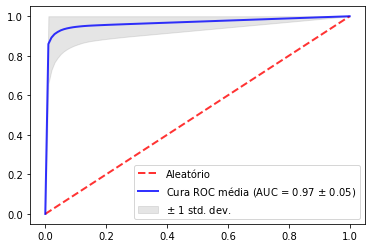

In [ ]:
# C3 = 8 CLASSES
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_C3'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(8, df_class['y_hat'], df_class['y_test'])

<Figure size 432x288 with 0 Axes>

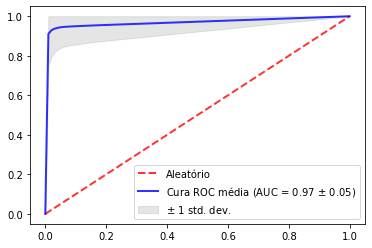

In [ ]:
# C4 = 20 CLASSES
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'UFOP_DA_C4'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(20, df_class['y_hat'], df_class['y_test'])

##Curva ROC por sinalizador MINDS (6)

<Figure size 432x288 with 0 Axes>

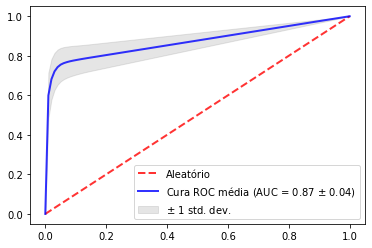

In [ ]:
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR_6'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(20, df_class['y_hat'], df_class['y_test'])

<Figure size 432x288 with 0 Axes>

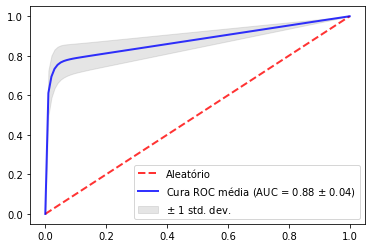

In [ ]:
df_class = pd.DataFrame(Run_experiments.execute("SELECT * FROM results WHERE experiment = 'MINDS_DA_SINALIZADOR_6b'",database_path))
df_class.columns = ['Experimento','Sinalizador','Accuracy','Precision','Recall','F1','Time_seconds', 'y_hat', 'y_test']
plots.plot_roc_curve(20, df_class['y_hat'], df_class['y_test'])